In [1]:
import pandas as pd
import numpy as np
import funcy
import os
import json
import subprocess
from dateutil.parser import parse as parse_date
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

from dev import GITHUB_TOKEN

In [3]:
ROOT_DIR = '/Users/Lraymond/Python/gitkit_research'
DATA_DIR = os.path.join(ROOT_DIR, 'data')


In [4]:
def gitkit_owner(owner, start, end, GITHUB_TOKEN=GITHUB_TOKEN):
    start, end = map(lambda x: str(int(x.timestamp())), (start, end))
    result = subprocess.check_output(
            ["/Users/Lraymond/Python/gitkit_research/gitkit/gitkit-darwin-v0.5/gitkit", 
             "--owner", owner, "--start", start, "--end", end,
            "--token", GITHUB_TOKEN], 
            cwd='/Users/Lraymond/Python/gitkit_research/gitkit/gitkit-darwin-v0.5')
    _, results = result.split(b'\n{"')
    results2 = b'{\"' + results
    return json.loads(results2.decode("utf8"))

def gitkit_owner_alloutput(owner, start, end, GITHUB_TOKEN=GITHUB_TOKEN):
    start, end = map(lambda x: str(int(x.timestamp())), (start, end))
    # need to redirect stout to file as well because lots of output being sent to stdout
    with open(os.path.join(DATA_DIR, 'gitkit_basic_{}.txt'.format(owner)), 'w') as f:
        result = subprocess.check_output(
            ["/Users/Lraymond/Python/gitkit_research/gitkit/gitkit-darwin-v0.5/gitkit", 
             "--owner", owner, "--start", start, "--end", end,
            "--token", GITHUB_TOKEN], 
            cwd='/Users/Lraymond/Python/gitkit_research/gitkit/gitkit-darwin-v0.5', 
            stdout=f)
    # currently doesn't work
    _, results = r.split(b'\n{"')
    results2 = b'{\"'+results
    return json.loads(results2.decode("utf8"))


In [6]:
def conv_dates(dict_obj, keys):
    for key in keys:
        if key in dict_obj:
            new_key = '{}Date'.format(key)
            print('converting ', new_key)
            dict_obj[new_key] = datetime.fromtimestamp(dict_obj[key])
    return dict_obj

In [8]:
def gitkit_git(owner, repo, GITHUB_TOKEN=GITHUB_TOKEN):
    # takes owner and repo, no times, returns git information
    try:
        result = subprocess.check_output(
            ["/Users/Lraymond/Python/gitkit_research/gitkit/gitkit-darwin-v0.5/gitkit-git", 
         "--owner", owner, "--repository", repo, "--token", GITHUB_TOKEN],
            cwd='/Users/Lraymond/Python/gitkit_research/gitkit/gitkit-darwin-v0.5')
        _, i2 = result.split(b'\n[{')
        i3 = b'\n[{' + i2
        return json.loads(i3.decode("utf8"))
    except subprocess.CalledProcessError as e:
        print(e.output)
        return e.output

In [5]:
# only run if no pickle object exists
r = gitkit_owner("ipfs", parse_date("12/12/2014"), parse_date("06/19/2018"))

ipfs = gitkit_git("ipfs", "js-ipfs")

In [7]:
owner_results = conv_dates(r, ['EarliestCreatedAt', 'LatestCreatedAt'])

converting  EarliestCreatedAtDate
converting  LatestCreatedAtDate


In [11]:
# dump output to pickle
# pickle raw output from gitkit-git command
with open(os.path.join(DATA_DIR, 'raw_ipfs_gitkit-git.p'), 'wb') as f:
    pickle.dump(ipfs, f)

In [ ]:
# load raw pickle object
with open(os.path.join(DATA_DIR, 'raw_ipfs_gitkit-git.p'), 'wb') as f:
    ipfs = pickle.load(f)

In [12]:
# pickle output from gitkit summary commands
with open(os.path.join(DATA_DIR, 'raw_ipfs_gitkit-sum.p'), 'wb') as f:
    pickle.dump(owner_results, f)

In [ ]:
# load raw pickle object
with open(os.path.join(DATA_DIR, 'raw_ipfs_gitkit-sum.p'), 'rb') as f:
    owner_results = pickle.load(f)

In [14]:

ipfs2 = list(map(lambda x: conv_dates(x, ['timestamp']), ipfs))

converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  

converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  timestampDate
converting  

In [15]:
# remove empty dicts
js = pd.DataFrame(list(filter(None, ipfs2)))

In [16]:
print(js.shape)
js.loc[js.author_email!=js.committer_email].shape

(1562, 18)


(479, 18)

In [17]:
# 86 authors, 36 unique commmiters - only is a commiter but not an author'noreply@github.com'
unique_authors = js.author_email.unique()
unique_commiters = js.committer_email.unique()


In [18]:
set(unique_commiters) - set(unique_authors)

{'noreply@github.com'}

In [19]:
# for each unique author, calculate number of binaries, commets, files, lines, number of tests
author_agg_dict = {
    'dev_ops_score': ['mean', 'median'], 
        'readability_score': ['mean', 'median', ],
        'web_dev_score':['mean', 'median'],
        'message_length':['mean', 'median', 'sum'],
       'number_of_bimaries':['mean', 'median', 'sum'], 
        'number_of_comments': ['mean', 'median', 'sum'],  
        'number_of_files': ['mean', 'median', 'sum'],
       'number_of_images': ['mean', 'median', 'sum'],
        'number_of_lines': ['mean', 'median', 'sum'],
         'number_of_tests': ['mean', 'median', 'sum'],
        'timestampDate': ['min', 'max'] }

by_author = js.groupby('author_email').agg(author_agg_dict)
by_commit = js.rename(columns={'message_length': 'commit_message_length'}).groupby('committer_email').agg({
    'commit_message_length':['mean', 'median', 'sum']})
# assuming message length is commit message length


In [20]:
auth_df = js[
    'author_email'].value_counts().to_frame('author_freq').reset_index().rename(columns={'index':'author_email'})
com_df = js[
    'committer_email'].value_counts().to_frame('committer_freq').reset_index().rename(columns={'index':'committer_email'})

In [21]:
by_author2 = pd.merge(
    left=by_author, on='author_email', right=auth_df)
by_commit2 = pd.merge(left=by_commit, on='committer_email', right=com_df)

/Users/Lraymond/Python/sourcecred_research/sourcecred_research3.6/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [22]:
stats_df = pd.merge(
    by_author2.set_index(
        'author_email', drop=False), by_commit2.set_index('committer_email', drop=False), left_index=True,
    right_index=True, how='outer')
stats_df.loc[:,['author_freq', 'committer_freq']] = stats_df[['author_freq', 'committer_freq']].fillna(0)

In [23]:
# parse email
def get_email_domain(email_str):
    # pull the @<>.com part of email from authors name
    SET_BAD_EMAILS = set(['noreply@github.com',])
    if pd.isnull(email_str) or email_str in SET_BAD_EMAILS:
        return np.nan
    return email_str.split('@')[1]
    
stats_df['email_domain'] = stats_df.index.map(get_email_domain)

Text(0.5,1,'Authorship by Email Domain - JS-IPFS')

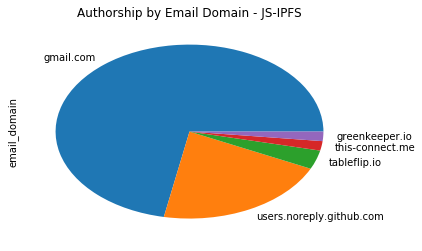

In [24]:
stats_df.email_domain.value_counts().iloc[:5].plot(kind='pie')
plt.title('Authorship by Email Domain - JS-IPFS')

In [25]:
# then plot over time, number of lines, commits, tests, readability score who is contributing to the lines of code
js2 = js.sort_values('timestampDate').set_index('timestampDate')
cum_sum = js2[
    ['number_of_lines', 'number_of_tests', 'number_of_files']].cumsum()
rolling_mean = js2[['readability_score', 'dev_ops_score']].rolling(window=100).mean()

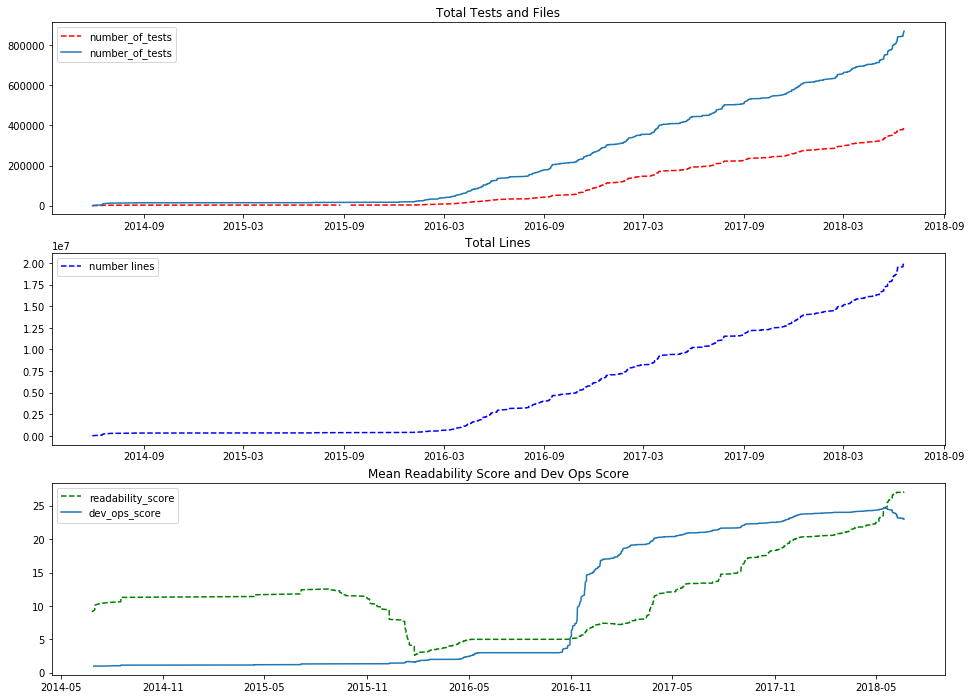

<Figure size 432x288 with 0 Axes>

In [55]:
import matplotlib.gridspec as gridspec

# need to add y labels, change size of subplots and update

# Create 3x1 sub plots
gs = gridspec.GridSpec(3, 1, width_ratios=[3])

plt.figure(1, figsize=(16,12))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.plot(cum_sum.number_of_tests, 'r--', cum_sum.number_of_files)
plt.title('Total Tests and Files')
ax.legend()

ax = plt.subplot(gs[1, 0]) # row 1, col 0
plt.plot(cum_sum.number_of_lines, 'b--', label='number lines')
plt.plot(legend=True)
plt.title('Total Lines')
ax.legend()

ax = plt.subplot(gs[2, 0]) # row 1, col 0
plt.plot(rolling_mean.readability_score, 'g--', rolling_mean.dev_ops_score)
plt.title('Mean Readability Score and Dev Ops Score')
ax.legend(rolling_mean)

plt.show()
plt.savefig(os.path.join(DATA_DIR, 'figures/js-ipfs_over_time.pdf'))



In [56]:

js.groupby('author_email')['number_of_lines'].agg(
    sum).sort_values(ascending=False)[:20]
# top authors

def percent_total(x, total):
    return (1.0*x.sum()/total)*100

pct_lines = lambda x: percent_total(x, js.number_of_lines.sum())

top20_df = js.groupby(
    'author_email')['number_of_lines'].agg(pct_lines).sort_values(
        ascending=False)[:20]
top20 = top20_df.index.values

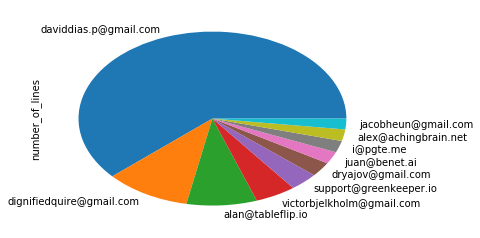

<Figure size 432x288 with 0 Axes>

In [57]:
top20_df.iloc[:10].plot(kind='pie')
plt.show()
plt.savefig(os.path.join(DATA_DIR, 'figures/js-ipfs_top_authors.pdf'))

In [58]:
g1 = js.groupby(
    ['author_email', 'timestampDate'], sort=True)[
    'number_of_lines'].sum().groupby(by='author_email').cumsum()
g2 = g1.reset_index('author_email', drop=False)
g3 = g2.loc[g2.author_email.isin(top20)]


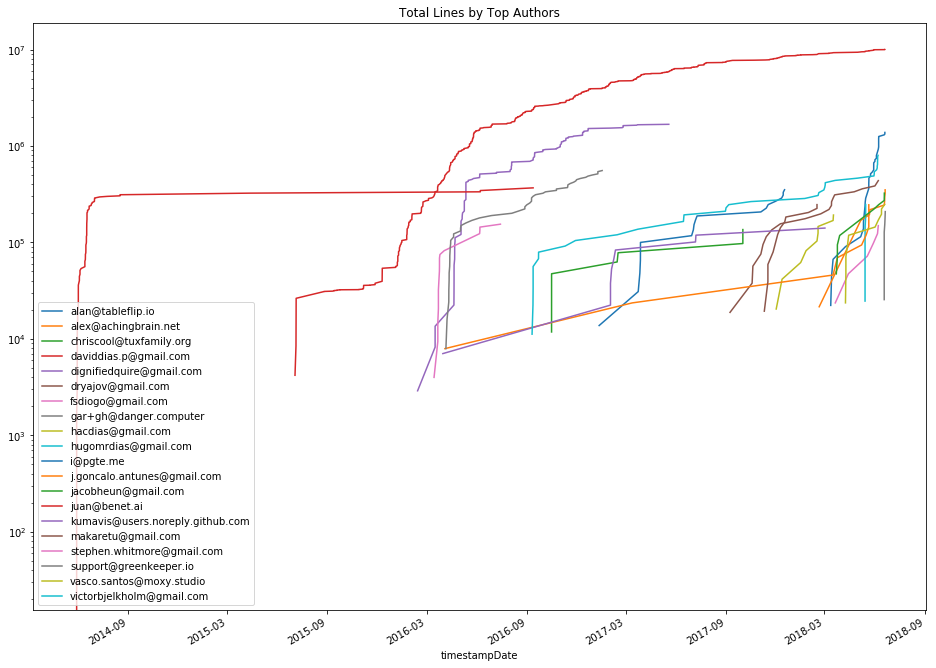

<Figure size 432x288 with 0 Axes>

In [60]:
# set up plotting
plt.figure(figsize=(16,12))
g3.groupby('author_email')['number_of_lines'].plot(legend=True, logy=True)
plt.title('Total Lines by Top Authors')
plt.legend(loc=3)
plt.show()
plt.savefig(os.path.join(DATA_DIR, 'figures/js-ipfs_lines_by_top_authors.png'))

In [61]:
# find unique contributors, rate by number of commits
# turn this into a timeseries in pandas
# can you get info from git by hash?
#/repos/:owner/:repo/git/commits/:commit_sha
import requests


In [98]:
def access_api_v3(api_path, construct=True):
    # note that api path cannot have a leading slash
    # must use necessary api terms (repos/orgs etc)
    # r = access_api_v3('orgs/ipfs/repos')
    params = {'Accept': 'application/vnd.github.v3+json', 
             'access_token': GITHUB_TOKEN}
    if construct:
        url = os.path.join('https://api.github.com', api_path)
    else:
        url = api_path
#     print('accessing url: ', url)
    r = requests.get(url, params=params)
    if r.status_code == requests.codes.ok:
        return r.json()
    print(r.status_code)
    return r.status_code

In [95]:
t = access_api_v3('repos/ipfs/js-ipfs/git/commits/ef0bf9ea37756c4272e21fea90b9fdab1013bd41')
b = access_api_v3('repos/ipfs/js-ipfs/git/commits/c924741737e00b33d1ab98fda1f77cb935d9e134')

In [119]:
def get_commit_info(com_hash):
    # for each commit hash, call the github commit api, get the commit message text and parents info
    repo_api = os.path.join('repos/ipfs/js-ipfs/git/commits', com_hash)
    res = access_api_v3(repo_api, construct=True)
    return res

def get_com_message(com_json):
    '''return commit message text from the json from the commit url'''
    if 'message' in com_json:
        return com_json['message']
    return np.nan

def get_parent_hash(com_json):
    '''return list of sha hash of parents of each commit is nonempty'''
    if 'parents' in com_json and com_json['parents'] is not None:
        return list(map(lambda x: x['sha'], com_json['parents']))
    return np.nan
    
def get_parent_authors(df, list_hashes):
    if not list_hashes:
        return np.nan
    strlist_hashes = map(str, list_hashes)
    parents = df.loc[df.hash.isin(strlist_hashes), 'author_email'].unique()
    if len(parents) > 1:
        print(parents)
    return parents

In [99]:
js['api_commit_info'] = js.hash.apply(get_commit_info)

In [102]:
js['commit_message'] = js.api_commit_info.apply(get_com_message)

In [103]:
js['parents_hashes'] = js.api_commit_info.apply(get_parent_hash)

In [120]:
js['parent_author'] = js.parents_hashes.apply(lambda x: get_parent_authors(js, x))

['juan@benet.ai' 'andrew@deandrade.com.br']
['andrew@deandrade.com.br' 'juan@benet.ai']
['andrew@deandrade.com.br' 'juan@benet.ai']
['daviddias.p@gmail.com' 'richard.littauer@gmail.com']
['daviddias.p@gmail.com' 'richard.littauer@gmail.com']
['daviddias.p@gmail.com' 'masylum@gmail.com']
['daviddias.p@gmail.com' 'xicombd@gmail.com']
['daviddias.p@gmail.com' 'xicombd@gmail.com']
['daviddias.p@gmail.com' 'xicombd@gmail.com']
['daviddias.p@gmail.com' 'xicombd@gmail.com']
['ginneversource@gmail.com' 'dignifiedquire@gmail.com']
['daviddias.p@gmail.com' 'ginneversource@gmail.com']
['daviddias.p@gmail.com' 'xicombd@gmail.com']
['daviddias.p@gmail.com' 'xicombd@gmail.com']
['daviddias.p@gmail.com' 'xicombd@gmail.com']
['xicombd@gmail.com' 'daviddias.p@gmail.com']
['daviddias.p@gmail.com' 'xicombd@gmail.com']
['daviddias.p@gmail.com' 'xicombd@gmail.com']
['daviddias.p@gmail.com' 'xicombd@gmail.com']
['daviddias.p@gmail.com' 'xicombd@gmail.com']
['daviddias.p@gmail.com' 'xicombd@gmail.com']
['dav

In [180]:
import re

def match_reg(regex_str, message_str, category):
    p = re.compile(regex_str, re.IGNORECASE)
    match_m = re.search(p, message_str)
    if match_m:
        return category
    return None


def tag_commit_message(message_str):
    '''
    Taximony to correctly tag commit messages and identify type of commit
    '''
    match_merge = match_reg(r'Merge pull request #', message_str, 'merge')
    if match_merge:
        return 'merge'
    t_merge = match_reg(r'test:|test\(\S+\)', message_str, 'test')
    if t_merge:
        return 'test'
    t_merge = match_reg(r'chore:|chore\(\S+\)', message_str, 'chore')
    if t_merge:
        return 'chore'
    t_merge = match_reg(r'fix:?|fix\(\S+\)', message_str, 'fix')
    if t_merge:
        return 'fix'
    t_merge = match_reg(r'feat:|feat\(\S+\)', message_str, 'feature')
    if t_merge:
        return 'feature'
    t_merge = match_reg(r'docs:?|docs\(\S+\)|README.MD|readme|roadmap', message_str, 'docs')
    if t_merge:
        return 'docs'
    t_merge = match_reg(r'refactor:?|refactor\(\S+\)', message_str, 'refactor')
    if t_merge:
        return 'refactor'
    t_merge = match_reg(r'wip:?|wip\(\S+\)', message_str, 'wip')
    if t_merge:
        return 'wip'  
    print('No match {}'.format(message_str))
    return np.nan


In [181]:
js['tag_message'] = js.commit_message.apply(tag_commit_message)

No match Big things have small beginnings.
No match gitingore
No match initial packets
No match initial peer
No match network frame :)
No match integrity frame.
No match PacketFrame autowrap Frame payloads
No match peek utils
No match simple try/test
No match test + file loading
No match addr resolution
No match pkt toStrings
No match pkt stream
No match integrity stream
No match network
No match msg-stream pkg
No match peer eq
No match push, not emit
No match use buffer equal
No match simplified streams, use duplexer
No match rm logs
No match peer book
No match Peer.peerId validator
No match ipfsStream
No match stream tests
No match PS: end
No match tape dep
No match valid checksum
No match ipfs core begins
No match ipfs-dht-routing skeleton
No match update duplex transform
No match double unwrap.
No match pkt now unwraps the PayloadFrame.
No match routing table
No match moved provide to dht
No match package.json
No match added nonce frame
No match blocks
No match bitswap start
No mat

In [182]:
js.tag_message.value_counts()

chore       345
fix         252
merge       236
feature     133
docs        131
test         73
refactor     18
wip           8
Name: tag_message, dtype: int64

In [183]:
g1 = js.groupby(
    ['tag_message', 'timestampDate'], sort=True)[
    'timestampDate'].count().groupby(by='tag_message').cumsum(
        ).rename(columns={'timestampDate':'count'})
g2 = pd.DataFrame(g1.reset_index('tag_message', drop=False))

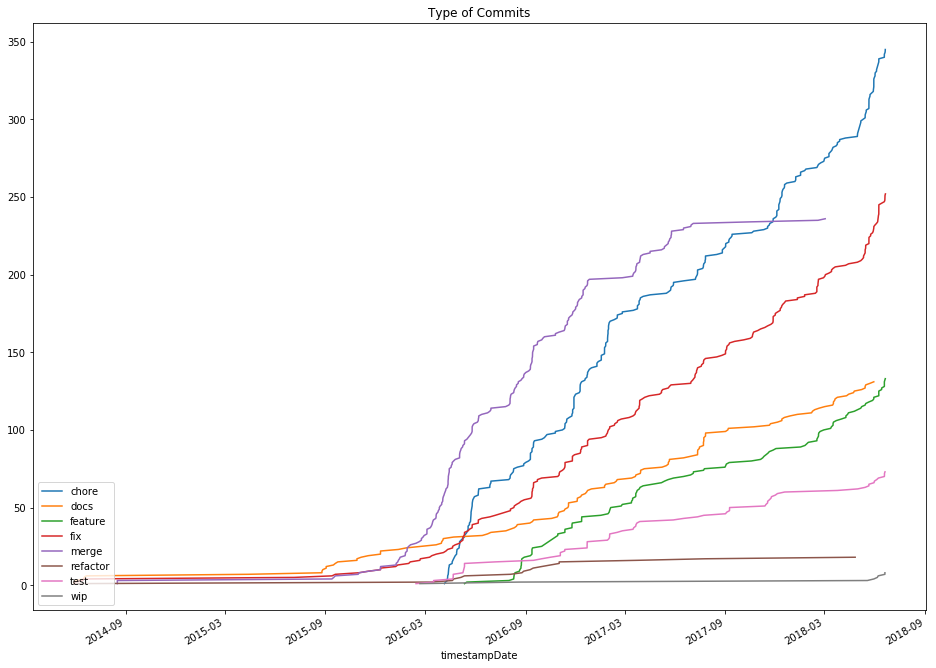

<Figure size 432x288 with 0 Axes>

In [184]:
# set up plotting
plt.figure(figsize=(16,12))
g2.groupby('tag_message')[0].plot(legend=True)
plt.title('Type of Commits')
plt.legend(loc=3)
plt.show()
plt.savefig(os.path.join(DATA_DIR, 'figures/js-ipfs_type_commits_over_time.png'))

In [122]:
js.loc[~js['author_email'].isin(js['parent_author'])]

,author_email,author_name,committer_email,committer_name,dev_ops_score,hash,license,message_length,number_of_bimaries,number_of_comments,...,number_of_lines,number_of_tests,readability_score,timestamp,timestampDate,web_dev_score,api_commit_info,commit_message,parents_hashes,parent_author
0,juan@benet.ai,Juan Batiz-Benet,juan@benet.ai,Juan Batiz-Benet,NaN,671660469dcb2ce06f6390f9fbe72b1db232ac5b,NaN,34,NaN,NaN,...,NaN,NaN,NaN,1400881514,2014-05-23 17:45:14,NaN,{'sha': '671660469dcb2ce06f6390f9fbe72b1db232a...,Big things have small beginnings.,[],NaN
1,juan@benet.ai,Juan Batiz-Benet,juan@benet.ai,Juan Batiz-Benet,NaN,5c2a1d5ac9c0f22fedb340c887a3fa87f5b786d1,NaN,7,NaN,4.0,...,29.0,NaN,1.0,1401359202,2014-05-29 06:26:42,NaN,{'sha': '5c2a1d5ac9c0f22fedb340c887a3fa87f5b78...,readme,[671660469dcb2ce06f6390f9fbe72b1db232ac5b],[juan@benet.ai]
2,juan@benet.ai,Juan Batiz-Benet,juan@benet.ai,Juan Batiz-Benet,NaN,19f292c9935aed817786397a62ca3ed01cf26e74,NaN,7,NaN,5.0,...,36.0,NaN,2.0,1401359213,2014-05-29 06:26:53,NaN,{'sha': '19f292c9935aed817786397a62ca3ed01cf26...,readme,[5c2a1d5ac9c0f22fedb340c887a3fa87f5b786d1],[juan@benet.ai]
3,juan@benet.ai,Juan Batiz-Benet,juan@benet.ai,Juan Batiz-Benet,1.0,d668a841ecdc115b351309690b24cbc0f7f37eda,NaN,10,NaN,5.0,...,38.0,NaN,2.0,1401359246,2014-05-29 06:27:26,NaN,{'sha': 'd668a841ecdc115b351309690b24cbc0f7f37...,gitingore,[19f292c9935aed817786397a62ca3ed01cf26e74],[juan@benet.ai]
4,juan@benet.ai,Juan Batiz-Benet,juan@benet.ai,Juan Batiz-Benet,1.0,5c237a92f049548e3e3097d73b5b3a28090ee005,NaN,16,NaN,84.0,...,454.0,3.0,3.0,1401359311,2014-05-29 06:28:31,5.0,{'sha': '5c237a92f049548e3e3097d73b5b3a28090ee...,initial packets,[d668a841ecdc115b351309690b24cbc0f7f37eda],[juan@benet.ai]
5,juan@benet.ai,Juan Batiz-Benet,juan@benet.ai,Juan Batiz-Benet,1.0,14194b1b3138f4cdc5a3d65716f3075bea1f943b,NaN,13,NaN,86.0,...,515.0,4.0,4.0,1401359511,2014-05-29 06:31:51,6.0,{'sha': '14194b1b3138f4cdc5a3d65716f3075bea1f9...,initial peer,[5c237a92f049548e3e3097d73b5b3a28090ee005],[juan@benet.ai]
6,juan@benet.ai,Juan Batiz-Benet,juan@benet.ai,Juan Batiz-Benet,1.0,cafec18626da73bd286276381caa199e34205636,NaN,17,NaN,85.0,...,561.0,4.0,4.0,1401360421,2014-05-29 06:47:01,7.0,{'sha': 'cafec18626da73bd286276381caa199e34205...,network frame :),[14194b1b3138f4cdc5a3d65716f3075bea1f943b],[juan@benet.ai]
7,juan@benet.ai,Juan Batiz-Benet,juan@benet.ai,Juan Batiz-Benet,1.0,a2bb1e90489557637f21aaf5a5b6a175c9843919,NaN,17,NaN,91.0,...,631.0,4.0,4.0,1401409834,2014-05-29 20:30:34,8.0,{'sha': 'a2bb1e90489557637f21aaf5a5b6a175c9843...,integrity frame.,[cafec18626da73bd286276381caa199e34205636],[juan@benet.ai]
8,juan@benet.ai,Juan Batiz-Benet,juan@benet.ai,Juan Batiz-Benet,1.0,cc32b9e51f6b921664b6309e06fa9154502fc0d1,NaN,36,NaN,91.0,...,638.0,4.0,4.0,1401445212,2014-05-30 06:20:12,8.0,{'sha': 'cc32b9e51f6b921664b6309e06fa9154502fc...,PacketFrame autowrap Frame payloads,[a2bb1e90489557637f21aaf5a5b6a175c9843919],[juan@benet.ai]
9,juan@benet.ai,Juan Batiz-Benet,juan@benet.ai,Juan Batiz-Benet,1.0,110b3bb6993b78fe31f3d7dfdefc5232c1aac7b0,NaN,11,NaN,102.0,...,700.0,4.0,4.0,1401445254,2014-05-30 06:20:54,9.0,{'sha': '110b3bb6993b78fe31f3d7dfdefc5232c1aac...,peek utils,[cc32b9e51f6b921664b6309e06fa9154502fc0d1],[juan@benet.ai]


In [ ]:
# find who are main parent authors - can you 
# can you split up by types of ocmmit messages?
# is there anything different about diff commits and authors?

In [68]:
os.path.join('repos/ipfs/js-ipfs/git/commits', 'ef0bf9ea37756c4272e21fea90b9fdab1013bd41')

'repos/ipfs/js-ipfs/git/commits/ef0bf9ea37756c4272e21fea90b9fdab1013bd41'

In [ ]:
ip_js

In [ ]:
# import output from running gitkit-git
with open(os.path.join(DATA_DIR, 'gitkit-git_out_js-ipfs.txt'), 'r') as f:
    r = f.readlines()


In [ ]:
with open(os.path.join(DATA_DIR, 'gitkit-github_out_js-ipfs.txt'), 'r') as f:
    r2 = f.readlines()

In [ ]:
json.loads(r2[0])